In [ ]:
#!pip3 install matplotlib_venn

In [ ]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
left_df = pd.read_csv('drive/MyDrive/PythonProject/left_dataset.csv')
right_df = pd.read_csv('drive/MyDrive/PythonProject/right_dataset.csv')


In [ ]:
left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98509 entries, 0 to 98508
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  98509 non-null  int64  
 1   name         98509 non-null  object 
 2   address      98509 non-null  object 
 3   city         98509 non-null  object 
 4   state        98509 non-null  object 
 5   zip_code     98509 non-null  object 
 6   size         98509 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94585 entries, 0 to 94584
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity_id    94585 non-null  int64  
 1   name         94585 non-null  object 
 2   address      91787 non-null  object 
 3   city         94585 non-null  object 
 4   state        94585 non-null  object 
 5   postal_code  94548 non-null  float64
 6   categories   94523 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.1+ MB


In [ ]:
left.head()

,business_id,name,address,city,state,zip_code,size
0,1,SOURINI PAINTING INC.,12800 44th St N,Clearwater,FL,33762-4726,11.0
1,2,WOLFF DOLLA BILL LLC,1905 E 19th Ave,Tampa,FL,33605-2700,8.0
2,3,"COMPREHENSIVE SURGERY CENTER, LLC","1988 GULF TO BAY BLVD, Ste 1",CLEARWATER,FL,33765-3550,8.0
3,4,FRANK & ADAM APPAREL LLC,13640 Wright Cir,Tampa,FL,33626-3030,12.0
4,5,MORENO PLUS TRANSPORT INC,8608 Huron Court unite 58,Tampa,FL,33614,8.0


In [ ]:
right.head()

,entity_id,name,address,city,state,postal_code,categories
0,1,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123.0,"Shipping Centers, Local Services, Notaries, Ma..."
1,2,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
2,3,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054.0,"Brewpubs, Breweries, Food"
3,4,Sonic Drive-In,615 S Main St,Ashland City,TN,37015.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
4,5,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144.0,"Sporting Goods, Fashion, Shoe Stores, Shopping..."


## Reformat case

In [ ]:
right.isnull().sum()

entity_id         0
name              0
address        2798
city              0
state             0
postal_code      37
categories       62
dtype: int64

In [ ]:
right['postal_code'] = right['postal_code'].astype(str).str.replace('.0', '')
left = left.apply(lambda x: x.astype(str).str.lower())
right = right.apply(lambda x: x.astype(str).str.lower())

C:\Users\DELL\AppData\Local\Temp\ipykernel_6636\823455782.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  right['postal_code'] = right['postal_code'].astype(str).str.replace('.0', '')


## EDA

In [ ]:
left['business_id'] = left['business_id'].astype(np.uint8,errors='ignore')
right['entity_id'] = right['entity_id'].astype(np.uint8,errors='ignore')

In [ ]:
left_count_unique = { 'attribute': ['name','address','city','state','zip_code'],
                      'unique_count': [left['name'].nunique(),left['address'].nunique()
                    ,left['city'].nunique(), left['state'].nunique()
                    , left['zip_code'].nunique()]}

In [ ]:
left_count_unique = pd.DataFrame(left_count_unique)

In [ ]:
left_count_unique

,attribute,unique_count
0,name,86341
1,address,80913
2,city,44
3,state,5
4,zip_code,40064


In [ ]:
left_count_unique = left_count_unique.sort_values('unique_count',ascending=False)

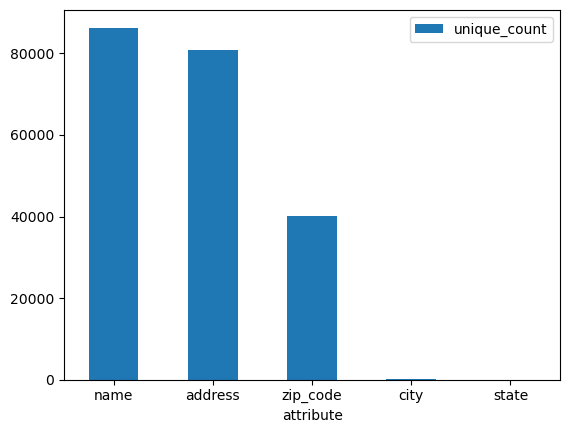

In [ ]:
ax = left_count_unique.plot.bar(x='attribute', y='unique_count', rot=0)

In [ ]:
right_count_unique = {'attribute': ['name','address','city','state','postal_code'],
                      'unique_count': [right['name'].nunique(),right['address'].nunique()
                    ,right['city'].nunique(), right['state'].nunique()
                    , right['postal_code'].nunique()]}

In [ ]:
right_count_unique = pd.DataFrame(right_count_unique)
right_count_unique = right_count_unique.sort_values('unique_count',ascending=False)
right_count_unique

,attribute,unique_count
1,address,77114
0,name,71975
2,city,794
4,postal_code,615
3,state,5


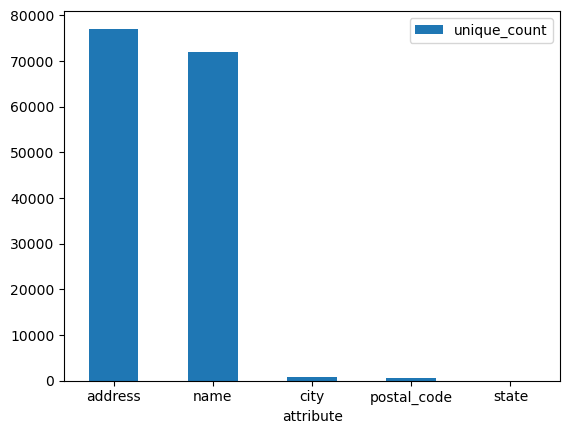

In [ ]:
ax = right_count_unique.plot.bar(x='attribute', y='unique_count', rot=0)

#### Name similarity

In [ ]:
l_name = left['name']
r_name = right['name']
merge = pd.merge(l_name, r_name, on='name', how='outer', indicator=True)
merge[merge['_merge'] == 'both']

,name,_merge
61,nutrition solutions,both
62,nutrition solutions,both
73,velocity air conditioning,both
243,mary jo's performing arts academy,both
322,beryl project engineering,both
...,...,...
98801,gyro plus,both
98893,gyro star,both
98918,lee house,both
98927,american legion post 82,both


Text(0.3, -0.25, '98.6%')

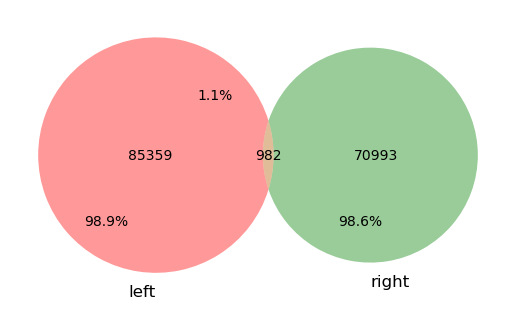

In [ ]:
l_name = set(left['name'])
r_name = set(right['name'])
venn2([l_name, r_name], set_labels=('left', 'right'))
ab = len(l_name & r_name) / len(l_name) * 100
a_not_b = len(l_name - r_name) / len(l_name) * 100
b_not_a = len(r_name - l_name) / len(r_name) * 100
plt.text(-0.2, 0.2, f"{ab:.1f}%", fontsize=10)
plt.text(-0.6, -0.25, f"{a_not_b:.1f}%", fontsize=10)
plt.text(0.3, -0.25, f"{b_not_a:.1f}%", fontsize=10)

#### Address similarity

Text(0.3, -0.25, '87.0%')

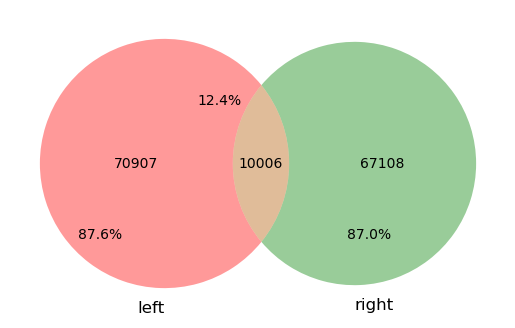

In [ ]:
l_add = set(left['address'])
r_add = set(right['address'])
venn2([l_add, r_add], set_labels=('left', 'right'))
ab = len(l_add & r_add) / len(l_add) * 100
a_not_b = len(l_add - r_add) / len(l_add) * 100
b_not_a = len(r_add - l_add) / len(r_add) * 100
plt.text(-0.2, 0.2, f"{ab:.1f}%", fontsize=10)
plt.text(-0.6, -0.25, f"{a_not_b:.1f}%", fontsize=10)
plt.text(0.3, -0.25, f"{b_not_a:.1f}%", fontsize=10)

#### State similarity

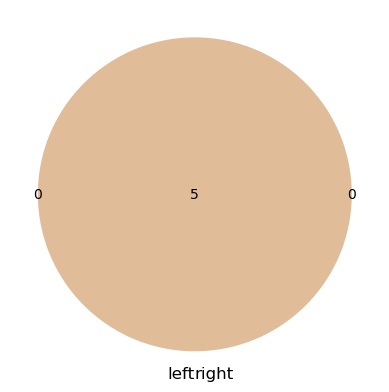

In [ ]:
l_s = set(left['state'])
r_s = set(right['state'])
venn2([l_s, r_s], set_labels=('left', 'right'))

In [ ]:
##left['zip_code'] = left['zip_code'].str.split('-').str[0]

#### City similarity

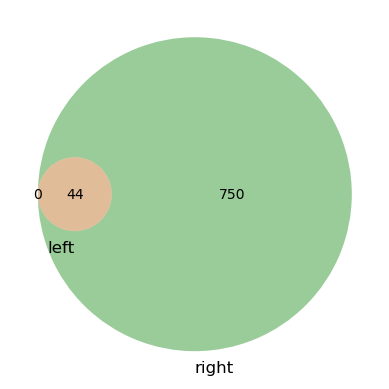

In [ ]:
l_c = set(left['city'])
r_c = set(right['city'])
venn2([l_c, r_c], set_labels=('left', 'right'))

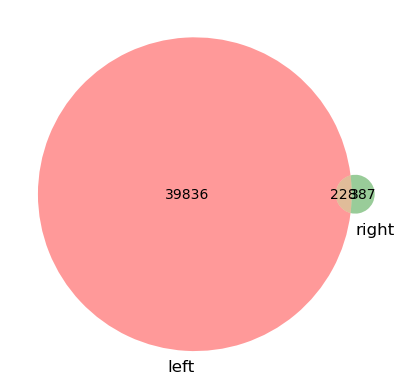

In [ ]:
l_zipcode = set(left['zip_code'])
r_postalcode = set(right['postal_code'])
venn2([l_zipcode, r_postalcode], set_labels=('left', 'right'))

In [ ]:
left['zip_code']

0        33762-4726
1        33605-2700
2        33765-3550
3        33626-3030
4             33614
            ...    
98504    37209-2135
98505         37207
98506    37206-3907
98507    37207-1236
98508    37207-4534
Name: zip_code, Length: 98509, dtype: object

In [ ]:
name_similar = len(l_name & r_name)
address_similar = len(l_add & r_add)
state_similar = len(l_s & r_s)
city_similar = len(l_c & r_c)
postalcode_similar = len(l_zipcode & r_postalcode)

In [ ]:
similarity_count = {'attribute_similar': ['name','address','state','city','postal_code'],
                      'similarity_count': [len(l_name & r_name),
                                           len(l_add & r_add),
                                           len(l_s & r_s),
                                           len(l_c & r_c),
                                           len(l_zipcode & r_postalcode)]}

In [ ]:
similarity_pct = {'attribute_similar': ['name','address','state','city','postal_code'],
                      'similarity_pct': [(len(l_name & r_name)/len(l_name))*100,
                                           (len(l_add & r_add)/len(l_add))*100,
                                           (len(l_s & r_s)/len(l_s))*100,
                                           (len(l_c & r_c)/len(l_c))*100,
                                           (len(l_zipcode & r_postalcode)/len(l_zipcode))*100]}

In [ ]:
similarity_count = pd.DataFrame(similarity_count)
similarity_count = similarity_count.sort_values('similarity_count',ascending=False)
similarity_count

,attribute_similar,similarity_count
1,address,10006
0,name,982
4,postal_code,228
3,city,44
2,state,5


In [ ]:
similarity_pct = pd.DataFrame(similarity_pct)
similarity_pct = similarity_pct.sort_values('similarity_pct',ascending=False)
similarity_pct

,attribute_similar,similarity_pct
2,state,100.000000
3,city,100.000000
1,address,12.366369
0,name,1.137351
4,postal_code,0.569089


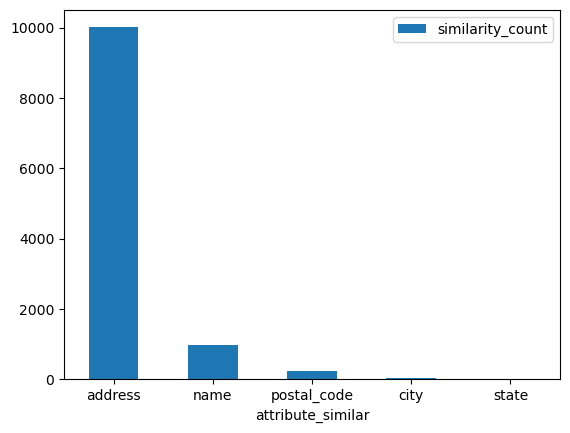

In [ ]:
ax = similarity_count.plot.bar(x='attribute_similar', y='similarity_count', rot=0)

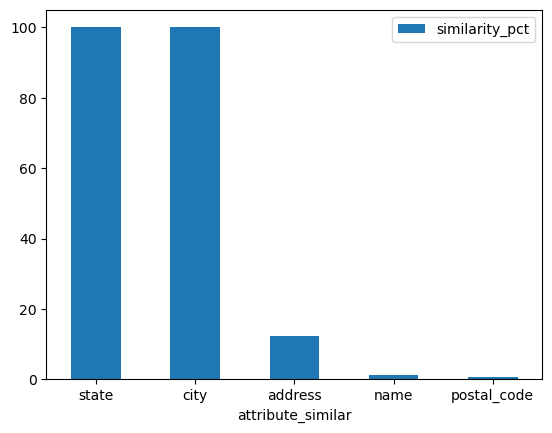

In [ ]:
ax = similarity_pct.plot.bar(x='attribute_similar', y='similarity_pct', rot=0)

In [ ]:
#right = right[['entity_id','combine']]
#left = left[['business_id','combine']]z

In [ ]:
#left_tokens = [set(word.lower().split()) for word in left['name']]
#right_tokens = [set(word.lower().split()) for word in right['name']]

In [ ]:
right['combine'] = right['name'] + right['address']+ right['city']+ right['state']+ right['postal_code']
right

,entity_id,name,address,city,state,postal_code,categories,combine
0,1,the ups store,87 grasso plaza shopping center,affton,mo,63123,"shipping centers, local services, notaries, ma...",the ups store87 grasso plaza shopping centeraf...
1,2,st honore pastries,935 race st,philadelphia,pa,197,"restaurants, food, bubble tea, coffee & tea, b...",st honore pastries935 race stphiladelphiapa197
2,3,perkiomen valley brewery,101 walnut st,green lane,pa,154,"brewpubs, breweries, food",perkiomen valley brewery101 walnut stgreen lan...
3,4,sonic drive-in,615 s main st,ashland city,tn,315,"burgers, fast food, sandwiches, food, ice crea...",sonic drive-in615 s main stashland citytn315
4,5,famous footwear,"8522 eager road, dierbergs brentwood point",brentwood,mo,63144,"sporting goods, fashion, shoe stores, shopping...","famous footwear8522 eager road, dierbergs bren..."
...,...,...,...,...,...,...,...,...
94580,117,adelita taqueria & restaurant,1108 s 9th st,philadelphia,pa,19147,"restaurants, mexican",adelita taqueria & restaurant1108 s 9th stphil...
94581,118,inspcenter/thai clinical massage,"2625 n meridian st, unit 50",indianapolis,in,468,"massage therapy, rolfing, beauty & spas, refle...",inspcenter/thai clinical massage2625 n meridia...
94582,119,wild birds unlimited,2813 bransford ave,nashville,tn,374,"pets, nurseries & gardening, pet stores, hobby...",wild birds unlimited2813 bransford avenashvill...
94583,120,claire's boutique,"6020 e 82nd st, ste 46",indianapolis,in,462,"shopping, jewelry, piercing, toy stores, beaut...","claire's boutique6020 e 82nd st, ste 46indiana..."


In [ ]:
left['combine'] = left['name'] + left['address']+ left['city']+ left['state']+ left['zip_code']
left = left.drop(["size"],axis=1)
left

,business_id,name,address,city,state,zip_code,combine
0,1,sourini painting inc.,12800 44th st n,clearwater,fl,33762 4726,sourini painting inc.12800 44th st nclearwater...
1,2,wolff dolla bill llc,1905 e 19th ave,tampa,fl,33605 2700,wolff dolla bill llc1905 e 19th avetampafl3360...
2,3,"comprehensive surgery center, llc","1988 gulf to bay blvd, ste 1",clearwater,fl,33765 3550,"comprehensive surgery center, llc1988 gulf to ..."
3,4,frank & adam apparel llc,13640 wright cir,tampa,fl,33626 3030,frank & adam apparel llc13640 wright cirtampaf...
4,5,moreno plus transport inc,8608 huron court unite 58,tampa,fl,33614,moreno plus transport inc8608 huron court unit...
...,...,...,...,...,...,...,...
98504,201,tm inc. llc,4911 georgia ave,nashville,tn,37209 2135,tm inc. llc4911 georgia avenashvilletn37209 2135
98505,202,"passion transportation services, llc",2005 quail dr,nashville,tn,37207,"passion transportation services, llc2005 quail..."
98506,203,rosie cleaning service/commercial,705 n 9th st,nashville,tn,37206 3907,rosie cleaning service/commercial705 n 9th stn...
98507,204,vicky bibbs,1249 dalemere dr,nashville,tn,37207 1236,vicky bibbs1249 dalemere drnashvilletn37207 1236


### 1.1 Combine Name and Address then find accuracy as a whole

In [ ]:
#fix zip_code to prepare for tokenization
left['zip_code'] = left['zip_code'].str.replace('-',' ')

## Generate algorithm